In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [10]:
df = pd.read_csv('mymoviedb.csv',  lineterminator= '\n')

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [13]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [16]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [25]:
 #Exploration summmary

# we have a dataframe consisting of 9827 rows and 9 columns 
# our dataset looks a bit with tidy with no duplicates values.
# Release_Date columns needs to be casted into date time to extract only the year value.
# Overview, Original_language and Poster_url wouldn't be so useful for these analysis, so we'll drop them.
# There is noticable outliers in popularity column.
# Vote_average better can be used for proper analysis.
# Genre column has coma separated values and white spaces that is not needed to be handled and casted into category. Exploration summary

In [27]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [30]:
df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [31]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [32]:
# Dropping the columns

In [39]:
cols = ['Overview', 'Original_Language','Poster_Url']

In [40]:
df.drop(cols, axis = 1, inplace= True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [41]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [42]:
df.tail()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"
9826,1984,Threads,13.354,186,7.8,"War, Drama, Science Fiction"


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9827 non-null   int32  
 1   Title         9827 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9827 non-null   int64  
 4   Vote_Average  9827 non-null   float64
 5   Genre         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 422.4+ KB


Categorizing average vote column
we would cut the vote_average values into 4 categories:popular, average, below_avg, not_popular to describe it more using catigorize_col() function provided above.

In [48]:
def catigorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels= labels, duplicates = 'drop')
    return df

In [49]:
labels= ['not_popular',' below_average', ' average', ' popular']

catigorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

[' popular', ' below_average', ' average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < ' below_average' < ' average' < ' popular']

In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [51]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular       2467
 popular          2450
 average          2412
 below_average    2398
Name: count, dtype: int64

In [52]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [53]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


We will splity into a list the genres and then explode our dataframe

In [54]:
df['Genre']=df['Genre'].str.split(', ')

df= df.explode('Genre').reset_index(drop= True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [56]:
# casting column into category
df['Genre']= df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [60]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [61]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Data Visualization 

In [62]:
sns.set_style('whitegrid')

what is the most frequent genre of moves on netflix?

In [63]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

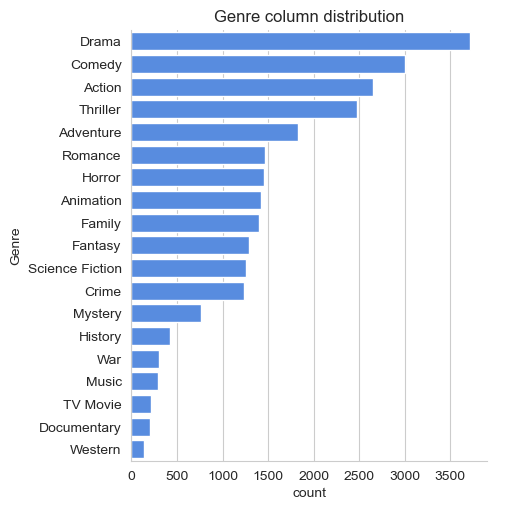

In [65]:
sns.catplot(y= 'Genre', data= df, kind='count',order= df["Genre"].value_counts().index,
            color='#4287f5')
plt.title("Genre column distribution")
plt.show()

Which has the highest votes in vote average column?

In [66]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


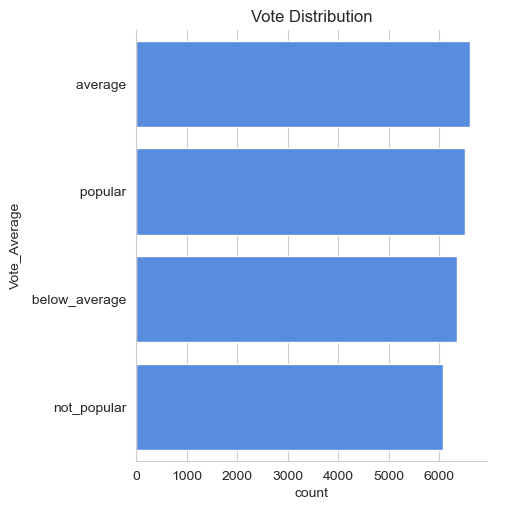

In [69]:
sns.catplot(y= 'Vote_Average', data= df, kind= 'count',
            order= df['Vote_Average'].value_counts().index,
            color= '#4287f5')
plt.title('Vote Distribution')
plt.show()

What movie got the highest popularity? what's the genre?

In [70]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [72]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


What movie got the lowest popularity? what its genre?

In [73]:
df[df['Popularity']== df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


What year has the most filmed movies?

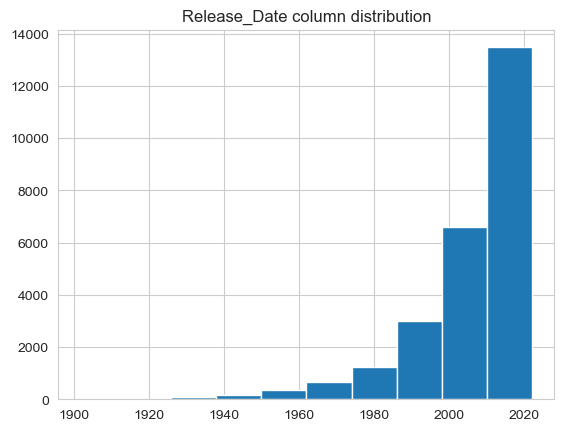

In [74]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

Conclusion
Drama genre is the most frequant genre in this dataset and has appeared mor ethan 14% of the timesamong 19 other genres.
2.
We have 25.5% of our dataset with popular vote(6520 rows). Drama again gets the highest popularity among the fans by being for more than 18.5% of movies overall
3.
Spider-man: No way home has the highest popularity rate in our dataset and it's has action, adventure and science friction.
4.
The united states, thread' has the lowest rate in this dataset and it has genre of music, drama, war ,'sci-fi' and history.
5.
Year 2020 has the highest filming rate in this dataset.